# Определение стоимости автомобилей

**Описание исследования**

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» стремится расширить свою клиентскую базу и улучшить сервис для текущих пользователей. В рамках этого направления планируется разработка приложения, способного точно определять рыночную стоимость подержанных автомобилей. Это позволит пользователям получать актуальные и обоснованные оценки своих автомобилей, что повысит доверие к сервису и привлечет новых клиентов.

**Цель исследования**

Разработать и внедрить модель машинного обучения, которая будет точно предсказывать рыночную стоимость подержанных автомобилей на основе технических характеристик, комплектации и исторических цен других автомобилей.

**Суть исследования**

Провести анализ и обработку предоставленных данных о подержанных автомобилях, а затем построить и оценить различные модели машинного обучения для определения их эффективности в задаче предсказания цены. Это позволит выбрать наиболее подходящую модель, учитывая критерии качества предсказания, время обучения и время предсказания модели.

# Задачи исследования

**1.Сбор и подготовка данных:**

- Загрузка и первичное изучение данных из файла `/datasets/autos.csv`.
- Очистка данных: заполнение пропущенных значений и обработка аномалий.
- Удаление неинформативных признаков.

**2.Подготовка выборок:**

- Разделение данных на обучающую и тестовую выборки.
- Применение методов кодирования категориальных признаков и масштабирования числовых.

**3.Построение моделей:**

- Обучение различных моделей машинного обучения (градиентный бустинг - `LightGBM`, `CatBoost`) и более простые модели (линейная регрессия - `Ridge` и `Lasso`, решающие деревья - `Random Forest`).
- Настройка гиперпараметров для каждой модели.

**4.Оценка моделей:**

Сравнение моделей по следующим критериям:

- Точность предсказания (метрика RMSE).
- Время обучения моделей.
- Время предсказания моделей.

**5.Выбор и проверка лучшей модели:**

- Выбор модели, оптимально соответствующей критериям заказчика.
- Проверка качества выбранной модели на тестовой выборке.

**6.Документация и рекомендации:**

- Оформление результатов исследования.
- Рекомендации по внедрению модели в приложение сервиса «Не бит, не крашен».

**Исходные данные**

Исследование будет проводиться на основе данных, содержащихся в файле `/datasets/autos.csv`. Данный датасет включает следующие признаки:

- `DateCrawled` — дата скачивания анкеты из базы.
- `VehicleType` — тип автомобильного кузова.
- `RegistrationYear` — год регистрации автомобиля.
- `Gearbox` — тип коробки передач.
- `Power` — мощность (л. с.).
- `Model` — модель автомобиля.
- `Kilometer` — пробег (км).
- `RegistrationMonth` — месяц регистрации автомобиля.
- `FuelType` — тип топлива.
- `Brand` — марка автомобиля.
- `Repaired` — была ли машина в ремонте или нет.
- `DateCreated` — дата создания анкеты.
- `NumberOfPictures` — количество фотографий автомобиля.
- `PostalCode` — почтовый индекс владельца анкеты (пользователя).
- `LastSeen` — дата последней активности пользователя.

Целевой признак
- `Price` — цена (евро)

**План работы**

1. Изучение общей информации
2. Подготовка данных
3. Построение и обучение моделей
4. Оценка и сравнение моделей
5. Выбор и валидация лучшей модели
6. Общий вывод

## Изучение общей информации
### Установка и импорт необходимых библиотек

In [1]:
pip install lightgbm -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade xgboost -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade xgboost scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [7]:
import time
import warnings
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import scipy.sparse as sp
import xgboost as xgb
from time import time as timer
from random import randint
from tqdm import tqdm_notebook
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, OneHotEncoder, StandardScaler, LabelEncoder

In [8]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# игнорируем предупреждения
#pd.set_option('chained_assignment', None)  

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

warnings.filterwarnings('ignore')

### Загрузка данных

In [9]:
try:
    data = pd.read_csv('autos.csv') 
except:
    data = pd.read_csv('/datasets/autos.csv')

### Получение информации о данных:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [11]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Вводим новые названия столбцов

In [12]:
columns = {
    'DateCrawled': 'date_crawled',
    'Price': 'price',
    'VehicleType': 'vehicle_type',
    'RegistrationYear': 'registration_year',
    'Gearbox': 'gearbox',
    'Power': 'power',
    'Model': 'model',
    'Kilometer': 'mileage_km',
    'RegistrationMonth': 'month_of_registration',
    'FuelType': 'fuel_type',
    'Brand': 'brand',
    'Repaired': 'not_repaired',
    'DateCreated': 'date_of_creation',
    'NumberOfPictures': 'number_of_pictures',
    'PostalCode': 'postal_code',
    'LastSeen': 'last_seen'
}
data = data.rename(columns=columns)
data.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage_km,month_of_registration,fuel_type,brand,not_repaired,date_of_creation,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Признаки**
- `date_crawled` — дата скачивания анкеты из базы
- `vehicle_type` — тип автомобильного кузова
- `registration_year` — год регистрации автомобиля
- `gearbox` — тип коробки передач
- `power` — мощность (л. с.)
- `model` — модель автомобиля
- `mileage_km` — пробег (км)
- `month_of_registration` — месяц регистрации автомобиля
- `fuel_type` — тип топлива
- `brand` — марка автомобиля
- `not_repaired` — была машина в ремонте или нет
- `date_of_creation` — дата создания анкеты
- `number_of_pictures` — количество фотографий автомобиля
- `postal_code` — почтовый индекс владельца анкеты (пользователя)
- `last_seen` — дата последней активности пользователя

**Целевой признак**
- `price` — цена (евро)

In [13]:
data.describe()

,price,registration_year,power,mileage_km,month_of_registration,number_of_pictures,postal_code
count,"354,369.00","354,369.00","354,369.00","354,369.00","354,369.00","354,369.00","354,369.00"
mean,"4,416.66","2,004.23",110.09,"128,211.17",5.71,0.00,"50,508.69"
std,"4,514.16",90.23,189.85,"37,905.34",3.73,0.00,"25,783.10"
min,0.00,"1,000.00",0.00,"5,000.00",0.00,0.00,"1,067.00"
25%,"1,050.00","1,999.00",69.00,"125,000.00",3.00,0.00,"30,165.00"
50%,"2,700.00","2,003.00",105.00,"150,000.00",6.00,0.00,"49,413.00"
75%,"6,400.00","2,008.00",143.00,"150,000.00",9.00,0.00,"71,083.00"
max,"20,000.00","9,999.00","20,000.00","150,000.00",12.00,0.00,"99,998.00"


**Краткий вывод на основе `data.describe()`:**

`Цена (price)`:
- Среднее: 4,416.66
- Диапазон: от 0 до 20,000
- Выбросы: Значение 0 и очень высокая цена (20,000) указывают на аномалии.

`Год регистрации (registration_year)`:- Среднее: 2004.23
- Диапазон: от 1,000 до 9,999
- Выбросы: Год 1,000 явно некорректен и требует проверки.

`Мощность (power)`:
- Среднее: 110.09
- Диапазон: от 0 до 20,000
- Выбросы: Значения 0 и 20,000 свидетельствуют о неправильных данных.

`Пробег (mileage_km)`:
- Среднее: 128,211.17 км
- Диапазон: от 5,000 до 150,000 км
- Стандартное отклонение: Высокое, но в пределах ожидаемого для подержанных автомобилей.

`Месяц регистрации (month_of_registration)`:
- Среднее: 5.71
- Диапазон: от 0 до 12
- Выбросы: Значение 0 не является допустимым месяцем и требует проверки.

`Количество фотографий (number_of_pictures)`:
- Все значения: 0
- Заключение: Отсутствие фотографий для всех записей, что может негативно влиять на анализ.

`Почтовый код (postal_code)`:
- Среднее: 50,508.69
- Диапазон: от 1,067 до 99,998
- Выбросы: Необычные значения требуют проверки корректности.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date_crawled           354369 non-null  object
 1   price                  354369 non-null  int64 
 2   vehicle_type           316879 non-null  object
 3   registration_year      354369 non-null  int64 
 4   gearbox                334536 non-null  object
 5   power                  354369 non-null  int64 
 6   model                  334664 non-null  object
 7   mileage_km             354369 non-null  int64 
 8   month_of_registration  354369 non-null  int64 
 9   fuel_type              321474 non-null  object
 10  brand                  354369 non-null  object
 11  not_repaired           283215 non-null  object
 12  date_of_creation       354369 non-null  object
 13  number_of_pictures     354369 non-null  int64 
 14  postal_code            354369 non-null  int64 
 15  

### Поиск дубликатов

In [15]:
def show_duplicates(data):
    duplicates = data.duplicated().sum()
    print(f'Количество дубликатов: {duplicates} ({duplicates / len(data):.3%})')
show_duplicates(data)

Количество дубликатов: 4 (0.001%)


In [16]:
processed_data = data.drop_duplicates().reset_index(drop=True)
show_duplicates(processed_data)

Количество дубликатов: 0 (0.000%)


In [17]:
def show_implicit_duplicates(data):
    # Определим комбинации столбцов для поиска неявных дубликатов
    subset_columns = ['date_crawled', 'vehicle_type', 'gearbox', 'mileage_km',
                      'month_of_registration', 'fuel_type', 'not_repaired',
                      'date_of_creation', 'number_of_pictures', 'postal_code',
                      'last_seen','brand', 'model', 'registration_year', 'power']
    
    # Найдем неявные дубликаты
    implicit_duplicates = data.duplicated(subset=subset_columns).sum()
    
    print(f'Количество неявных дубликатов: {implicit_duplicates} ({implicit_duplicates / len(data):.2%})')

# Применим функцию к исходным данным
show_implicit_duplicates(data)

# Применим функцию к обработанным данным
show_implicit_duplicates(processed_data)

Количество неявных дубликатов: 5 (0.00%)
Количество неявных дубликатов: 1 (0.00%)


**Неинформативные признаки:**
- `date_crawled` - дата скачивания анкеты не может влиять на стоимость автомобиля.
- `month_of_registration` - порядковый номер месяца регистрации автомобиля не понадобится.
- `date_of_creation` - точная дата публикации не понадобится, непонятно как обрабатывать этот признак для обучения. Оставлю год публикации, так как стоимость может меняться год от года.
- `number_of_pictures` - судя по описанию данных - столбец не заполнен, во всех строках стоят нули. К тому же, количество фотографий автомобиля вряд ли влияет на его стоимость.
- `last_seen` - дата последней активности пользователя не может влиять на стоимость автомобиля.

In [18]:
processed_data['date_crawled'] = processed_data['date_crawled'].astype('datetime64').dt.year
deleted_data = processed_data.query('date_crawled < registration_year')
print(f'Данных удалено: {len(deleted_data)} ({len(deleted_data)/len(processed_data):.2%})')
processed_data = processed_data.query('date_crawled >= registration_year')

Данных удалено: 14530 (4.10%)


In [19]:
# Удаляем ненужные столбцы
columns_to_drop = ['postal_code', 'month_of_registration', 'number_of_pictures', 'last_seen']
processed_data['date_of_creation'] = processed_data['date_of_creation'].astype('datetime64')
processed_data['year_of_creation'] = processed_data['date_of_creation'].dt.year
columns_to_drop.append('date_of_creation')

# Определяем максимальную дату в столбце date_crawled перед его удалением (это мне пригодится ниже)
max_date = processed_data['date_crawled'].max()
max_year = max_date

### Обработка пропусков:

In [20]:
def show_nulls(data):
    nulls = data.isnull().sum()
    data_null = pd.DataFrame({
        'quantity': nulls,
        'percentage': round(nulls / len(data) * 100, 1)
    })
    data_null = data_null.query('percentage != 0').sort_values(by='percentage', ascending=False)
    data_null.columns = pd.MultiIndex.from_tuples(
        zip(['Количество пропусков в столбцах', 'Количество пропусков в столбцах'], data_null.columns)
    )
    if len(data_null) == 0:
        return 'Пропусков нет'
    return data_null

In [21]:
show_nulls(processed_data)

Количество пропусков в столбцах           
                                    quantity percentage
not_repaired                           64855      19.10
fuel_type                              27301       8.00
vehicle_type                           22980       6.80
gearbox                                17966       5.30
model                                  17658       5.20

В столбце `not_repaired` больше всего пропусков, заменить их с помощью других данных нельзя. Данных много, чтобы удалить без последствий.
Присвою пропускам категорию `unknown`.

In [22]:
processed_data['not_repaired'] = processed_data['not_repaired'].fillna('unknown')
show_nulls(processed_data)

Количество пропусков в столбцах           
                                    quantity percentage
fuel_type                              27301       8.00
vehicle_type                           22980       6.80
gearbox                                17966       5.30
model                                  17658       5.20

**Столбец `vehicle_type`**

In [23]:
vehicles = processed_data['vehicle_type'].value_counts()
vehicles_df = pd.DataFrame({'Типы автомобилей': vehicles}).sort_values(by='Типы автомобилей', ascending=False)
vehicles_df

,Типы автомобилей
sedan,91453
small,79826
wagon,65161
bus,28773
convertible,20202
coupe,16158
suv,11995
other,3287


Помимо пропусков есть тип `other`, пропуски можно отнести к нему.

In [24]:
processed_data['vehicle_type'] = processed_data['vehicle_type'].fillna('other')
show_nulls(processed_data)

Количество пропусков в столбцах           
                                 quantity percentage
fuel_type                           27301       8.00
gearbox                             17966       5.30
model                               17658       5.20

**Столбец `fuel_type`**

In [25]:
fuels = processed_data['fuel_type'].value_counts()
fuel_df = pd.DataFrame({'Типы топлива': fuels}).sort_values(by='Типы топлива', ascending=False)
fuel_df

,Типы топлива
petrol,210015
gasoline,96308
lpg,5159
cng,542
hybrid,225
other,196
electric,89


Аналогично пропускам в `vehicle_type`, пропуски в `fuel_type` отнесём к группе `other`.

In [26]:
processed_data['fuel_type'] = processed_data['fuel_type'].fillna('other')
show_nulls(processed_data)

Количество пропусков в столбцах           
                               quantity percentage
gearbox                           17966       5.30
model                             17658       5.20

**Столбец `gearbox`**

Заменить пропуски с помощью других данных нельзя.Данных много, чтобы удалить их без последствий.\
Присвою пропускам категорию `unknown`.

In [27]:
processed_data['gearbox'] = processed_data['gearbox'].fillna('unknown')
show_nulls(processed_data)

Количество пропусков в столбцах           
                             quantity percentage
model                           17658       5.20

**Столбец `model`**

Аналогично пропускам в `fuel_type` и `vehicle_type`, можно отнести пропуски к группе `other`.

In [28]:
processed_data['model'] = processed_data['model'].fillna('other')
show_nulls(processed_data)

'Пропусков нет'

### Обработка выбросов:

In [29]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339835 entries, 0 to 354364
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date_crawled           339835 non-null  int64         
 1   price                  339835 non-null  int64         
 2   vehicle_type           339835 non-null  object        
 3   registration_year      339835 non-null  int64         
 4   gearbox                339835 non-null  object        
 5   power                  339835 non-null  int64         
 6   model                  339835 non-null  object        
 7   mileage_km             339835 non-null  int64         
 8   month_of_registration  339835 non-null  int64         
 9   fuel_type              339835 non-null  object        
 10  brand                  339835 non-null  object        
 11  not_repaired           339835 non-null  object        
 12  date_of_creation       339835 non-null  date

**Столбец `price`**

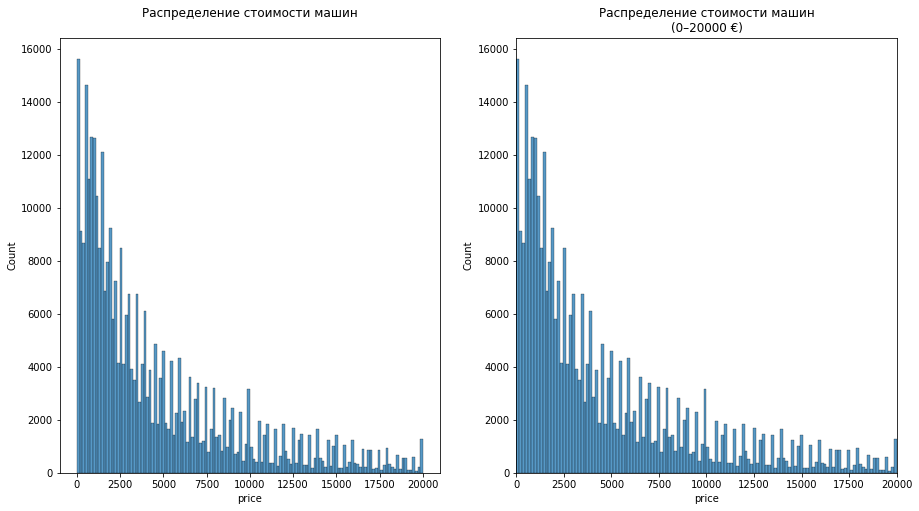

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(processed_data['price'], ax=axes[0])
axes[0].set_title('Распределение стоимости машин\n')
sns.histplot(processed_data['price'], ax=axes[1])
axes[1].set_title('Распределение стоимости машин\n(0–20000 €)')
plt.xlim([0, 20000])
plt.show()

In [31]:
low_price = processed_data.query('price == 0')['power'].count()
print(f'Количество автомобилей со стоимостью 0 €: {low_price} ({low_price / len(processed_data):.2%})')

Количество автомобилей со стоимостью 0 €: 10021 (2.95%)


Минимальная стоимость автомобиля, мне кажется не может быть ниже 500 €.\
Удалю данные автомобилей стоимость которых ниже 500 €.

In [32]:
low_price_500 = processed_data.query('price < 500')['power'].count()
print(f'Количество автомобилей со стоимостью менее 500 €: {low_price_500} ({low_price_500 / len(processed_data):.2%})')

Количество автомобилей со стоимостью менее 500 €: 34565 (10.17%)


Количество довольно большое, но оставлю пока так.

In [33]:
processed_data = processed_data.query('price > 500')

**Столбец `registration_year`**

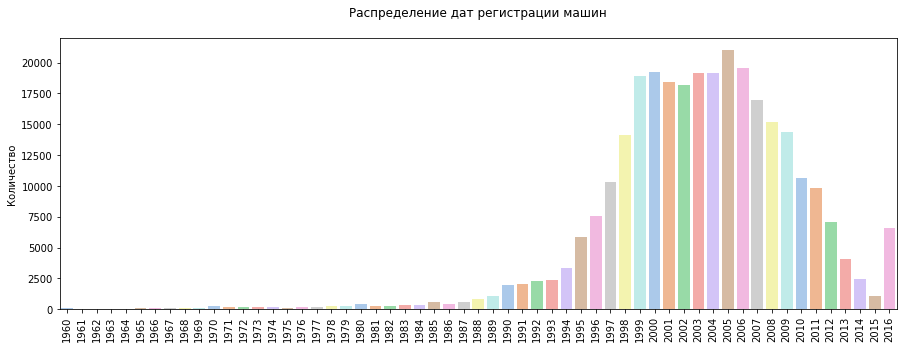

In [34]:
filt_data = processed_data.query('registration_year > 1959 & registration_year < 2023')
plt.figure(figsize=(15, 5))
pivot_years = filt_data.pivot_table(index='registration_year', values='power', aggfunc='count')
fig = sns.barplot(x=pivot_years.index, y='power', data=pivot_years, palette='pastel')
plt.title('Распределение дат регистрации машин\n')
plt.xlabel('')
plt.ylabel('Количество')
plt.setp(fig.get_xticklabels(),rotation=90)
plt.show()

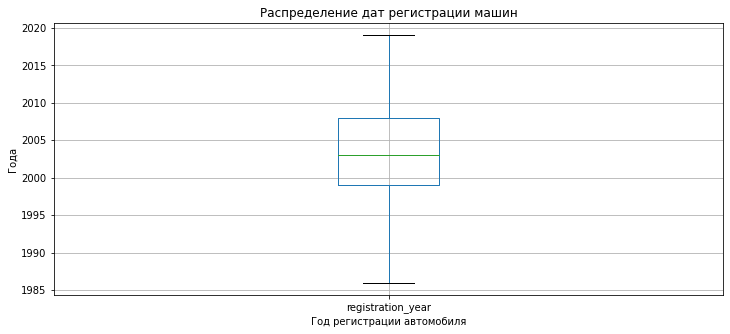

In [35]:
data.boxplot(column='registration_year', showfliers=False, figsize=(12, 5))
plt.xlabel("Год регистрации автомобиля")
plt.ylabel('Года')
plt.title('Распределение дат регистрации машин')
plt.show()

Непонятно от какой даты можно считать актуальные даты регистрации автомобиля.\
Предварительно возьму рамки 1960–2022 годы.

In [36]:
# Фильтруем данные по годам регистрации
processed_data = processed_data.query('registration_year >= 1960 & registration_year <= @max_year')

# Проверяем количество отфильтрованных данных
rejected_year = len(data) - len(processed_data)
print(
    f'Количество отфильтрованных данных (до 1960 и после {max_year})\n'
    f'{rejected_year} ({rejected_year / len(data):.2%})'
)

# Теперь можно удалить ненужные столбцы
processed_data = processed_data.drop(columns_to_drop, axis=1)

Количество отфильтрованных данных (до 1960 и после 2016)
54823 (15.47%)


In [37]:
rejected_year = processed_data.query('registration_year <= 1959 | registration_year > 2016')['power'].count()
print(
    f'Количество отфильтрованных данных (до 1960 и после 2016 года)\n'
    f'{rejected_year} ({rejected_year / len(data):.2%})'
)

Количество отфильтрованных данных (до 1960 и после 2016 года)
0 (0.00%)


Возьму рамки 1960–2016 годы.

In [38]:
filt_data = processed_data.copy()

**Столбец `power`**

In [39]:
processed_data['power'].describe()

count   299,546.00
mean        116.78
std         186.80
min           0.00
25%          75.00
50%         109.00
75%         150.00
max      20,000.00
Name: power, dtype: float64

Средняя мощность автомобиля в 2024 году составляет 212 л.с.\
~Предварительно остановлюсь на диапазоне 50-374 л.с.~

In [40]:
#filt_data = processed_data.query('power > 50 & power <= 1000')
#data_loss = len(processed_data) - len(filt_data)
#print(f'Потеря данных при фильтрации: {data_loss} ({data_loss / len(processed_data):.2%})')

~10.63% данных - это большое количество для того, чтобы убирать их.\~
~Но так как средняя мощность спорткаров до 2017 года примерно 1000 л.с., то оставлю данные с мощностью <= 1000 л.с. и заменю нули в признаке `Power` на медиану по `model`.~

In [41]:
#filt_data = processed_data.query('power <= 1000')
#filt_data['power'] = filt_data['power'].replace(0, np.NaN)
#filt_data['power'] = filt_data['power'].fillna(filt_data.groupby('model')['power'].transform(lambda x: x.median() if not x.median() is None else np.nan)
#)

In [42]:
# Устанавливаем верхний и нижний пределы для мощности
lower_bound = 50
upper_bound = 1000

# Фильтруем данные по мощности
filt_data = processed_data.query('power <= @upper_bound')

# Заменяем нули на NaN
filt_data['power'] = filt_data['power'].replace(0, np.NaN)

# Заменяем значения ниже нижнего предела на NaN
filt_data['power'] = filt_data['power'].where(filt_data['power'] >= lower_bound, np.NaN)

# Заполняем NaN значениями медианы по модели
filt_data['power'] = filt_data['power'].fillna(
    filt_data.groupby('model')['power'].transform(lambda x: x.median() if not x.median() is None else np.nan)
)

# Проверяем потерю данных
data_loss = len(processed_data) - len(filt_data)
print(f'Потеря данных при фильтрации: {data_loss} ({data_loss / len(processed_data):.2%})')

Потеря данных при фильтрации: 227 (0.08%)


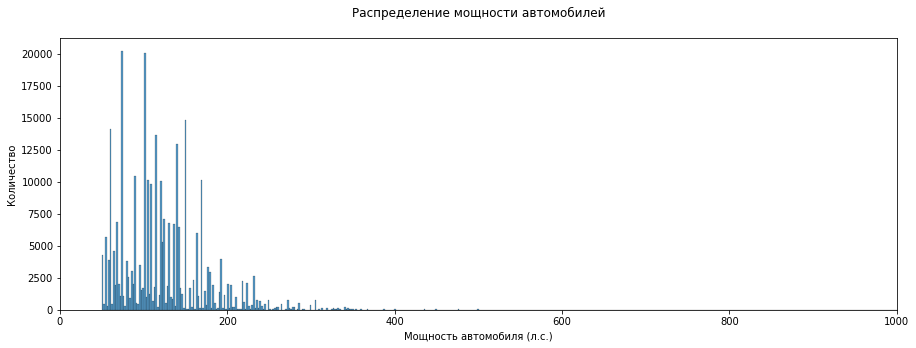

In [43]:
plt.figure(figsize=(15, 5))
sns.histplot(filt_data['power'])
plt.title('Распределение мощности автомобилей\n')
plt.xlim([0, 1000])
plt.ylabel('Количество')
plt.xlabel('Мощность автомобиля (л.с.)')
plt.show()

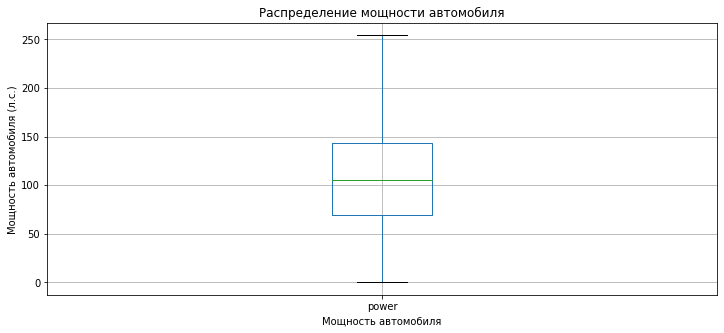

In [44]:
data.boxplot(column='power', showfliers=False, figsize=(12, 5))
plt.xlabel("Мощность автомобиля")
plt.ylabel('Мощность автомобиля (л.с.)')
plt.title('Распределение мощности автомобиля')
plt.show()

In [45]:
df = filt_data.copy()

**Столбец `mileage_km`**

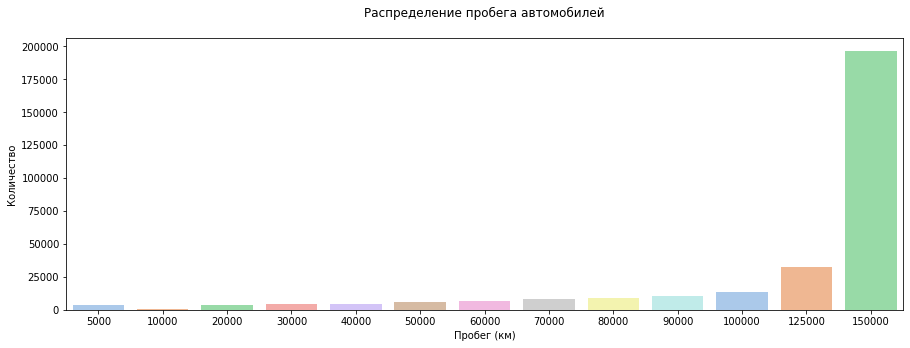

In [46]:
plt.figure(figsize=(15, 5))
pivot_mileage = df.pivot_table(index='mileage_km', values='price', aggfunc='count')
fig = sns.barplot(x=pivot_mileage.index, y='price', data=pivot_mileage, palette='pastel')
plt.ylabel('Количество')
plt.xlabel('Пробег (км)')
plt.title('Распределение пробега автомобилей\n')
plt.show()

Пробег разбит на категории несмотря на то, что категории заданы числами. Бо́льшая часть в категории 150 тыс. км.\
Возможно в эту категорию попадают автомобили с пробегом более 150 тыс. км.

In [47]:
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage_km,fuel_type,brand,not_repaired,year_of_creation
1,2016,18300,coupe,2011,manual,190.00,other,125000,gasoline,audi,yes,2016
2,2016,9800,suv,2004,auto,163.00,grand,125000,gasoline,jeep,unknown,2016
3,2016,1500,small,2001,manual,75.00,golf,150000,petrol,volkswagen,no,2016
4,2016,3600,small,2008,manual,69.00,fabia,90000,gasoline,skoda,no,2016
5,2016,650,sedan,1995,manual,102.00,3er,150000,petrol,bmw,yes,2016


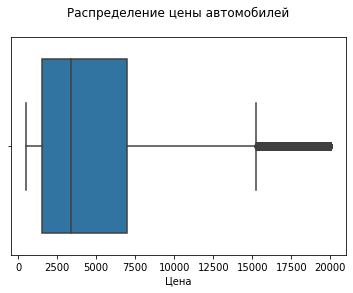

In [48]:
sns.boxplot(x=df['price'])
plt.xlabel('Цена')
plt.title('Распределение цены автомобилей\n')
plt.show()

In [49]:
def show_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f'Количество дубликатов: {duplicates} ({duplicates / len(df):.2%})')
show_duplicates(df)

Количество дубликатов: 40146 (13.41%)


In [50]:
df_cleaned = df.drop_duplicates()

In [51]:
new_duplicates = df_cleaned.duplicated().sum()
print(f'Количество дубликатов после удаления: {new_duplicates} ({new_duplicates / len(df_cleaned):.2%})')

Количество дубликатов после удаления: 0 (0.00%)


**Промежуточный вывод:**
- Поправил названия столбцов;
- Удалил столбцы, которые не могут повлиять на стоимость автомобиля - `date_crawled`, `month_of_registration`, `number_of_pictures`, `last_seen`;
- Столбец `date_of_creation` преобразовал в год публикации;
- Обработал пропуски;
- Обработал выбросы.

## Подготовка данных

### Подготовка признаков

**Проверка наличия пропусков**

In [52]:
print(df.isna().sum())

date_crawled         0
price                0
vehicle_type         0
registration_year    0
gearbox              0
power                1
model                0
mileage_km           0
fuel_type            0
brand                0
not_repaired         0
year_of_creation     0
dtype: int64


**Заполнение NaN медианой**

In [53]:
df.fillna(df.median(), inplace=True)

**Разделю данные на признаки и целевую переменную:**

In [54]:
X = df.drop('price', axis=1)
y = df['price']

~**Применим LabelEncoder к категориальным столбцам**~

In [55]:
#label_encoders = {}
#for column in ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']:
#    le = LabelEncoder()
#    X[column] = le.fit_transform(X[column])
#    label_encoders[column] = le

## Построение и обучение моделей

**Разделение набора данных на тренировочный и тестовый**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

После разделения данных на обучающую и тестовую выборки полезно проверить размеры и размерности этих наборов. Это помогает убедиться, что разбиение прошло корректно и что данные были распределены так, как ожидалось:

In [57]:
print("Размеры выборок:")
print(f"X_train: {X_train.shape[0]} строк, {X_train.shape[1]} столбцов")
print(f"X_test: {X_test.shape[0]} строк, {X_test.shape[1]} столбцов")
print(f"y_train: {y_train.shape[0]} элементов")
print(f"y_test: {y_test.shape[0]} элементов")

Размеры выборок:
X_train: 239455 строк, 11 столбцов
X_test: 59864 строк, 11 столбцов
y_train: 239455 элементов
y_test: 59864 элементов


**Определение категориальных и числовых признаков:**

In [58]:
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
numerical_features = ['registration_year', 'power', 'mileage_km', 'year_of_creation']

### Обучение и сравнение моделей Ridge и Lasso для определения рыночной стоимости автомобилей

**Создание трансформера**

In [59]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

**Объединяем трансформеры в один ColumnTransformer**

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

**Создаем пайплайн для Ridge и Lasso:**

In [61]:
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', Ridge(random_state=42))])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', Lasso(random_state=42))])

**Определение параметров для поиска**

In [62]:
ridge_param_distributions = {'regressor__alpha': [0.1, 1.0, 10.0]}
lasso_param_distributions = {'regressor__alpha': [0.1, 1.0, 10.0]}

**Настройка RandomizedSearchCV с кросс-валидацией для Ridge и для Lasso**

In [63]:
ridge_search = RandomizedSearchCV(ridge_pipeline, ridge_param_distributions,
                                  n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(X_train, y_train)

lasso_search = RandomizedSearchCV(lasso_pipeline, lasso_param_distributions,
                                  n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['registration_year',
                                                                                'power',
                                                                                'mileage_km',
                                                                                'year_of_creation']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['vehicle_type',
                                                                                'gearbox',
                                                                                'model',
                                                                                'fuel_type',
                                                                                'brand',
                                                                                'not_repaired'])])),
                                             ('regressor',
                                              Lasso(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'regressor__alpha': [0.1, 1.0, 10.0]},
                   scoring='neg_mean_squared_error')

**Вывод лучших параметров и оценок RMSE**

In [64]:
print("Лучшие параметры Ridge:", ridge_search.best_params_)
print("Лучший RMSE Ridge на кросс-валидации: {:.2f}".format(np.sqrt(-ridge_search.best_score_)))

print("Лучшие параметры Lasso:", lasso_search.best_params_)
print("Лучший RMSE Lasso на кросс-валидации: {:.2f}".format(np.sqrt(-lasso_search.best_score_)))


Лучшие параметры Ridge: {'regressor__alpha': 0.1}
Лучший RMSE Ridge на кросс-валидации: 2653.63
Лучшие параметры Lasso: {'regressor__alpha': 0.1}
Лучший RMSE Lasso на кросс-валидации: 2655.07


**Вывод:**
На основании проведенного анализа моделей `Ridge` и `Lasso` для определения рыночной стоимости автомобилей, можно сделать следующий вывод:
- Лучший RMSE для модели `Ridge` составил 2653.63, а для модели `Lasso` — 2655.07. Оба значения превышают установленный порог в 2500, что указывает на недостаточную точность предсказаний этих моделей для данной задачи.

### Обучение моделей градиентного бустинга  и модели решающие деревья

**Определение категориальных и числовых признаков**

In [65]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

results = []

**Функция для оценки древесных моделей с использованием Pipeline и ColumnTransformer**

In [66]:
def evaluate_tree_model(model_class, param_grid, X_train, y_train, categorical_features, numerical_features, unknown_value=-1):
    # Преобразование категориальных столбцов в тип category
    for col in categorical_features:
        X_train[col] = X_train[col].astype('category')

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=unknown_value), categorical_features),
            ('num', 'passthrough', numerical_features)
        ]
    )
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_class())
    ])
    
    param_grid_with_prefix = {f'model__{key}': value for key, value in param_grid.items()}
    
    # Замер времени поиска лучшей модели
    start_time = timer()
    gs = GridSearchCV(pipeline, param_grid_with_prefix, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    gs.fit(X_train, y_train)
    search_time = timer() - start_time
    
    best_rmse = np.sqrt(-gs.best_score_)
    best_params = gs.best_params_
    
    # Обучаем лучшую модель на всех данных
    best_model = gs.best_estimator_
    
    start_training_time = timer()
    best_model.fit(X_train, y_train)
    training_time = timer() - start_training_time
    
    # Оценка времени предсказания
    start_time_predict = timer()
    _ = best_model.predict(X_train)
    prediction_time = timer() - start_time_predict
    
    return best_rmse, best_params, best_model, training_time, prediction_time

**Функция для оценки бустинговых моделей без Pipeline**

In [67]:
def evaluate_boosting_model(model_class, param_grid, X_train, y_train, categorical_features=None,
                            numerical_features=None, unknown_value=-1):
    # Преобразование категориальных столбцов в тип category для моделей, поддерживающих категориальные данные
    if categorical_features:
        for col in categorical_features:
            X_train[col] = X_train[col].astype('category')

    # Создание модели
    if model_class == CatBoostRegressor:
        model = model_class(cat_features=categorical_features, random_state=42, verbose=0)
    else:
        model = model_class(random_state=42)

    # Замер времени поиска лучшей модели
    start_time = timer()
    gs = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    try:
        gs.fit(X_train, y_train)
    except Exception as e:
        print(f"Ошибка при обучении модели {model_class.__name__}: {e}")
        return None
    
    search_time = timer() - start_time
    
    # Получение лучшего результата
    best_rmse = np.sqrt(-gs.best_score_)
    best_params = gs.best_params_
    
    # Обучаем лучшую модель на всех данных и замеряем время обучения
    best_model = gs.best_estimator_
    
    start_training_time = timer()
    best_model.fit(X_train, y_train)
    training_time = timer() - start_training_time
    
    # Оценка времени предсказания
    start_time_predict = timer()
    _ = best_model.predict(X_train)
    prediction_time = timer() - start_time_predict
    
    return best_rmse, best_params, best_model, training_time, prediction_time

**Определение моделей и их параметров для настройки**

In [68]:
models_params = {
    'Random Forest': (RandomForestRegressor, {
        'n_estimators': [100, 200],
        'max_depth': [3, 6]
    }),
        'CatBoost': (CatBoostRegressor, {
        'iterations': [100, 200],
        'depth': [3, 5]
    }),
    'LightGBM': (LGBMRegressor, {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    }),
}

**Оценка моделей**

In [69]:
results = []

for model_name, (model_class, param_grid) in models_params.items():
    if model_name in ['Random Forest', 'LightGBM']:
        best_rmse, best_params, best_estimator, training_time, prediction_time = evaluate_tree_model(
            model_class,
            param_grid,
            X_train,
            y_train,
            categorical_features,
            numerical_features)
    else:
        result = evaluate_boosting_model(
            model_class,
            param_grid,
            X_train,
            y_train,
            categorical_features,
            numerical_features)
        
        # Проверка на None
        if result is None:
            print(f"Ошибка при оценке модели {model_name}. Пропускаем.")
            continue
        
        best_rmse, best_params, best_estimator, training_time, prediction_time = result
    
    results.append({
        'Модель': model_name,
        'Лучший RMSE': best_rmse,
        'Лучшие параметры': best_params,
        'Время обучения (сек)': training_time,
        'Время предсказания (сек)': prediction_time
    })

# Сбор результатов в DataFrame
results_df = pd.DataFrame(results)

# Используем display для вывода DataFrame
from IPython.display import display

display(results_df)

,Модель,Лучший RMSE,Лучшие параметры,Время обучения (сек),Время предсказания (сек)
0,Random Forest,"2,266.33","{'model__max_depth': 6, 'model__n_estimators': 100}",24.12,1.35
1,CatBoost,"1,685.62","{'depth': 5, 'iterations': 200}",37.36,0.48
2,LightGBM,"1,704.17","{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}",7.41,3.41


In [70]:
aggregated_results = results_df.groupby('Модель').agg({
    'Лучший RMSE': 'min',
    'Лучшие параметры': 'first',
    'Время обучения (сек)': 'min',
    'Время предсказания (сек)': 'min'
}).reset_index()

aggregated_results

,Модель,Лучший RMSE,Лучшие параметры,Время обучения (сек),Время предсказания (сек)
0,CatBoost,"1,685.62","{'depth': 5, 'iterations': 200}",37.36,0.48
1,LightGBM,"1,704.17","{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}",7.41,3.41
2,Random Forest,"2,266.33","{'model__max_depth': 6, 'model__n_estimators': 100}",24.12,1.35


## Оценка и сравнение моделей

**Определяем веса для каждого критерия**

In [71]:
weight_rmse = 0.5
weight_training_time = 0.25
weight_prediction_time = 0.25

**Создаем новый столбец для оценки модели**

In [72]:
results_df['Score'] = (
    weight_rmse * results_df['Лучший RMSE'] +
    weight_training_time * results_df['Время обучения (сек)'] +
    weight_prediction_time * results_df['Время предсказания (сек)']
)

**Находим индекс модели с наименьшим значением 'Score'**

In [73]:
best_model_index = results_df['Score'].idxmin()

## Выбор и валидация лучшей модели

**Выбор лучшей модели для финальной оценки на тестовой выборке**

In [74]:
best_model_info = results_df.loc[best_model_index]
best_model_name = best_model_info['Модель']
best_model_params = best_model_info['Лучшие параметры']

print(f"Лучшая модель: {best_model_name} с параметрами: {best_model_params}")

Лучшая модель: CatBoost с параметрами: {'depth': 5, 'iterations': 200}


**Обучение и оценка на тестовой выборке для лучшей модели:**

In [75]:
final_model_class = models_params[best_model_name][0]
final_model = final_model_class(random_state=42)

start_time = time.time()

if best_model_name in ['Random Forest', 'LightGBM']:
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
            ('num', 'passthrough', numerical_features)
        ]
    )
    
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', final_model)
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    y_pred = final_pipeline.predict(X_test)

else:
    catboost_params = ['iterations', 'depth', 'learning_rate', 'loss_function', 'l2_leaf_reg', 'border_count']

    filtered_best_model_params = {k: v for k, v in best_model_params.items() if k in catboost_params}

    final_model.set_params(**filtered_best_model_params)
    final_model.fit(X_train, y_train, cat_features=categorical_features)
    y_pred = final_model.predict(X_test)

Learning rate set to 0.360047
0:	learn: 3599.8985847	total: 278ms	remaining: 55.3s
1:	learn: 3048.8998050	total: 501ms	remaining: 49.6s
2:	learn: 2722.7760744	total: 741ms	remaining: 48.6s
3:	learn: 2479.8106892	total: 939ms	remaining: 46s
4:	learn: 2334.8306893	total: 1.18s	remaining: 45.9s
5:	learn: 2224.1738721	total: 1.39s	remaining: 45s
6:	learn: 2163.1730433	total: 1.58s	remaining: 43.6s
7:	learn: 2104.7180630	total: 1.76s	remaining: 42.2s
8:	learn: 2070.5321380	total: 1.94s	remaining: 41.3s
9:	learn: 2043.7769681	total: 2.08s	remaining: 39.6s
10:	learn: 2023.8016561	total: 2.23s	remaining: 38.3s
11:	learn: 2005.1488591	total: 2.41s	remaining: 37.7s
12:	learn: 1982.5750107	total: 2.63s	remaining: 37.9s
13:	learn: 1971.2462723	total: 2.81s	remaining: 37.3s
14:	learn: 1952.8184341	total: 3.03s	remaining: 37.4s
15:	learn: 1944.2713306	total: 3.23s	remaining: 37.1s
16:	learn: 1935.8141495	total: 3.46s	remaining: 37.2s
17:	learn: 1923.4345786	total: 3.62s	remaining: 36.6s
18:	learn: 1

In [76]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

model_time = time.time() - start_time

start_prediction_time = time.time()
_ = final_pipeline.predict(X_test) if best_model_name in ['Random Forest', 'LightGBM'] else final_model.predict(X_test)
prediction_time = time.time() - start_prediction_time

print(f"Лучшая модель: {best_model_name}")
print(f"RMSE: {test_rmse:.2f}")
print(f"Время обучения: {model_time:.2f} сек")
print(f"Время предсказания: {prediction_time:.2f} сек")

Лучшая модель: CatBoost
RMSE: 1653.00
Время обучения: 38.65 сек
Время предсказания: 0.15 сек


## Общий вывод

В рамках проекта по разработке приложения для сервиса по продаже автомобилей с пробегом «Не бит, не крашен» была построена модель для определения рыночной стоимости автомобилей на основе их технических характеристик и комплектации. В результате экспериментов с различными моделями, лучшей была выбрана модель `CatBoost` с результатами: RMSE = 1653.00, Время обучения = 38.65 сек, Время предсказания = 0.15 сек.
- Значение RMSE в 1653.00 указывает на то, что модель демонстрирует хорошее качество предсказания. Это значение значительно ниже установленного порога в 2500, что свидетельствует о высокой точности оценок рыночной стоимости автомобилей. Данная характеристика является критически важной для привлечения клиентов.
- Время обучения модели составляет 38.65 секунды. Это приемлемый показатель, учитывая сложность задачи и объем данных. Быстрое время обучения позволяет оперативно обновлять модель при поступлении новых данных.
- Время предсказания всего 0.15 секунды. Это очень быстрое время, что делает модель подходящей для использования в реальном времени в приложении, где пользователи ожидают мгновенных ответов.
  
Таким образом, CatBoost является оптимальным выбором для приложения «Не бит, не крашен», что позволит эффективно привлекать новых клиентов за счет предоставления точной информации о рыночной стоимости автомобилей.